In [6]:
import torch
import torchaudio
import requests
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display

In [7]:
path = '/hpcfs/users/a1784072/a1784072/whale/annotatedLibrary/annotatedLibrary/casey2014/wav/'

Shape of waveform: torch.Size([1, 3600622])
Sample rate of waveform: 1000


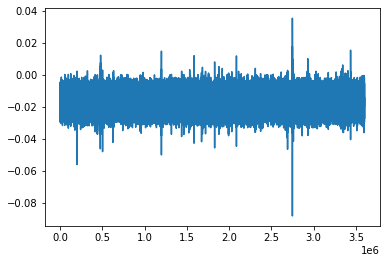

In [8]:
waveform, sample_rate = torchaudio.load(path+'200_2014-05-27_13-00-00.wav')

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

plt.figure()
plt.plot(waveform.t().numpy())

In [21]:
import os
wf = []
sr = []
for filename in os.listdir(path):
    if filename.endswith('.wav'):
        wf.append(torchaudio.load(path+filename)[0])
        sr.append(torchaudio.load(path+filename)[1])

In [22]:
print(type(wf), type(sr))

<class 'list'> <class 'list'>


In [23]:
print(type(wf[1]), type(sr[1]))
print(wf[1].shape, sr[1])

<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 3600579]) 1000


Shape of waveform: torch.Size([1, 3600622])
Sample rate of waveform: 1000


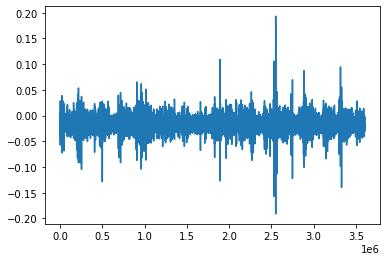

In [35]:
print("Shape of waveform: {}".format(wf[20].size()))
print("Sample rate of waveform: {}".format(sr[20]))

plt.figure()
plt.plot(wf[10].t().numpy())

Shape of spectrogram: torch.Size([1, 201, 18003])


/home/a1784072/.local/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: stft will require the return_complex parameter be explicitly  specified in a future PyTorch release. Use return_complex=False  to preserve the current behavior or return_complex=True to return  a complex output. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:653.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore
/home/a1784072/.local/lib/python3.8/site-packages/torch/functional.py:515: UserWarning: The function torch.rfft is deprecated and will be removed in a future PyTorch release. Use the new torch.fft module functions, instead, by importing torch.fft and calling torch.fft.fft or torch.fft.rfft. (Triggered internally at  /pytorch/aten/src/ATen/native/SpectralOps.cpp:590.)
  return _VF.stft(input, n_fft, hop_length, win_length, window,  # type: ignore


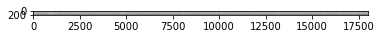

In [27]:
specgram = torchaudio.transforms.Spectrogram()(wf[10])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')

Shape of spectrogram: torch.Size([1, 201, 18003])


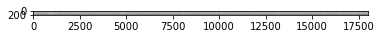

In [40]:
specgram = torchaudio.transforms.Spectrogram()(wf[10])

print("Shape of spectrogram: {}".format(specgram.size()))

plt.figure()
plt.imshow(specgram.log2()[0,:,:].numpy(), cmap='gray')


In [43]:
sr = 1000

In [46]:
def plot_mp3_matplot(filename):
    """
    plot_mp3_matplot -- using matplotlib to simply plot time vs amplitude waveplot
    
    Arguments:
    filename -- filepath to the file that you want to see the waveplot for
    
    Returns -- None
    """
    
    # sr is for 'sampling rate'
    # Feel free to adjust it
    x, sr = librosa.load(filename)
    plt.figure(figsize=(14, 5))
    librosa.display.waveplot(x, sr=sr)

def convert_audio_to_spectogram(filename):
    """
    convert_audio_to_spectogram -- using librosa to simply plot a spectogram
    
    Arguments:
    filename -- filepath to the file that you want to see the waveplot for
    
    Returns -- None
    """
    
    # sr == sampling rate 
    x, sr = librosa.load(filename, sr=44100)
    
    # stft is short time fourier transform
    X = librosa.stft(x)
    
    # convert the slices to amplitude
    Xdb = librosa.amplitude_to_db(abs(X))
    
    # ... and plot, magic!
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'hz')
    plt.colorbar()
    
# same as above, just changed the y_axis from hz to log in the display func    
def convert_audio_to_spectogram_log(filename):
    x, sr = librosa.load(filename, sr=44100)
    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(Xdb, sr = sr, x_axis = 'time', y_axis = 'log')
    plt.colorbar()    

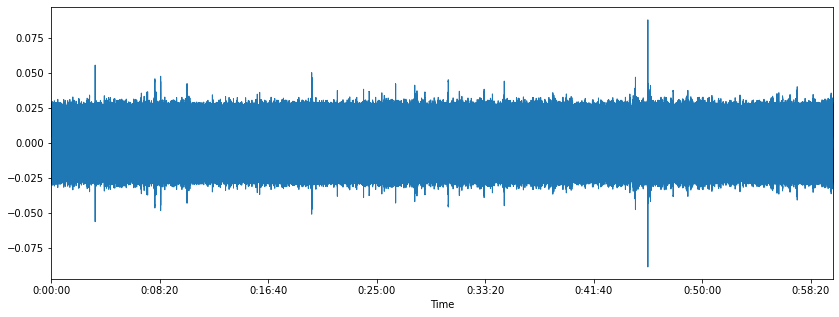

In [48]:
file_try = path+'200_2014-05-27_13-00-00.wav'
plot_mp3_matplot(file_try)

In [ ]:
 convert_audio_to_spectogram(file_try)

In [ ]:
convert_audio_to_spectogram_log(file_try)